In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

covid_data_prov = pd.read_csv('covid_19_clean_complete.csv')

# 1. Data Understanding
* **Data Preprocessing:** Are there any missing values or duplicates in
columns like
Confirmed, Deaths, Recovered, Tests, or Date?
* **Data Types:** What data types are assigned to columns such as Confirmed, Deaths,
Recovered, and Date? Are they correct?
* **Time-Series Data:** Is the dataset structured in a time-series format with the Date
column?


In [2]:
covid_data_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


 * Only **Province/State** has null value.
 * There is no **Test** column.
 * The columns for **Confirmed, Deaths, and Recovered are properly formatted**, whereas the **dates in the dataset are not formatted correctly**.

In [3]:
covid_data_prov.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

## Preprocessing the null values

In [4]:
covid_data_prov.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

* **Province/Stat** has **34404** null values.

## Fill missing Province/State with 'Unknown'

In [5]:
covid_data_prov['Province/State'].fillna('Unknown', inplace=True)

<ipython-input-5-e76e6a973c10>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  covid_data_prov['Province/State'].fillna('Unknown', inplace=True)


## Check for duplicates

In [6]:
covid_data_prov.duplicated().sum()

0

* There is **no duplicate row**.

In [7]:
pd.DataFrame(covid_data_prov.duplicated(subset=['Date', 'Confirmed', 'Deaths', 'Recovered'])).groupby(0).size()

0
False    36707
True     12361
dtype: int64

*  The data indicates that there were **12,361** instances where the same number of people were confirmed, reported as deaths, and recorded as recovered on the same date.

In [8]:
total_rows = len(covid_data_prov)
dub_rows_subset = 12361
(dub_rows_subset/total_rows)*100

25.191570881226056

*  **Approximately 25%** of the rows contain duplicate values, which is a substantial proportion and **suggests that the data may have been preprocessed or manipulated prior to analysis. This level of duplication is unlikely to occur naturally.**








### Removing the dublicates

In [9]:
covid_data = covid_data_prov.groupby(['Date', 'Confirmed', 'Deaths', 'Recovered'], as_index=False).first()

In [10]:
pd.DataFrame(covid_data.duplicated(subset=['Date', 'Confirmed', 'Deaths', 'Recovered'])).groupby(0).size()

0
False    36707
dtype: int64

In [11]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            36707 non-null  object 
 1   Confirmed       36707 non-null  int64  
 2   Deaths          36707 non-null  int64  
 3   Recovered       36707 non-null  int64  
 4   Province/State  36707 non-null  object 
 5   Country/Region  36707 non-null  object 
 6   Lat             36707 non-null  float64
 7   Long            36707 non-null  float64
 8   Active          36707 non-null  int64  
 9   WHO Region      36707 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 2.8+ MB


## Data Type

In [12]:
covid_data.dtypes

Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Province/State     object
Country/Region     object
Lat               float64
Long              float64
Active              int64
WHO Region         object
dtype: object


   - `Confirmed`: int64  
   - `Deaths`: int64  
   - `Recovered`: int64  
   - `Date`: object (not in proper date format)



## time-series format with the Date column

### To determine if the dataset is structured in a time-series format with the Date column, we need to verify two things:

1. **Presence of the Date column**:  
   The dataset should have a `Date` column.

2. **Chronological order of the Date column**:  
   The `Date` column should contain dates in a logical, sequential order (e.g., from earliest to latest).


In [13]:
try:
  covid_data['Date'] = pd.to_datetime(covid_data['Date'])
  print("The 'Date' column has been successfully converted to datetime format.")

        # Check if the dates are in chronological order
  is_sorted = covid_data['Date'].is_monotonic_increasing
  if is_sorted:
    print("The 'Date' column is in chronological order.")
  else:
    print("The 'Date' column is not in chronological order.")
except Exception as e:
  print(f"Error: {e}")

The 'Date' column has been successfully converted to datetime format.
The 'Date' column is in chronological order.


## The data after preprocessing.

In [14]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            36707 non-null  datetime64[ns]
 1   Confirmed       36707 non-null  int64         
 2   Deaths          36707 non-null  int64         
 3   Recovered       36707 non-null  int64         
 4   Province/State  36707 non-null  object        
 5   Country/Region  36707 non-null  object        
 6   Lat             36707 non-null  float64       
 7   Long            36707 non-null  float64       
 8   Active          36707 non-null  int64         
 9   WHO Region      36707 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 2.8+ MB


In [15]:
covid_data.head()

Date  Confirmed  Deaths  Recovered Province/State Country/Region  \
0 2020-01-22          0       0          0        Unknown    Afghanistan   
1 2020-01-22          1       0          0          Anhui          China   
2 2020-01-22          2       0          0        Guangxi          China   
3 2020-01-22          4       0          0         Hainan          China   
4 2020-01-22          5       0          0          Henan          China   

        Lat        Long  Active             WHO Region  
0  33.93911   67.709953       0  Eastern Mediterranean  
1  31.82570  117.226400       1        Western Pacific  
2  23.82980  108.788100       2        Western Pacific  
3  19.19590  109.745300       4        Western Pacific  
4  37.89570  114.904200       5        Western Pacific

In [16]:
covid_data.tail()

Date  Confirmed  Deaths  Recovered Province/State Country/Region  \
36702 2020-07-27     452529    7067     274925        Unknown   South Africa   
36703 2020-07-27     816680   13334     602249        Unknown         Russia   
36704 2020-07-27    1480073   33408     951166        Unknown          India   
36705 2020-07-27    2442375   87618    1846641        Unknown         Brazil   
36706 2020-07-27    4290259  148011    1325804        Unknown             US   

             Lat        Long   Active       WHO Region  
36702 -30.559500   22.937500   170537           Africa  
36703  61.524010  105.318756   201097           Europe  
36704  20.593684   78.962880   495499  South-East Asia  
36705 -14.235000  -51.925300   508116         Americas  
36706  40.000000 -100.000000  2816444         Americas

# 2. Descriptive Analysis
* **Total Cases & Deaths:** What is the total number of Covid-19 cases
(Confirmed) and
deaths (Deaths) in each country (Country)? Which country has the highest values?
* **Trend Analysis:** What is the trend in the number of Covid-19 cases (Confirmed) and
deaths (Deaths) over time (Date) in each country (Country)?
* **Geographical Distribution:** Which countries (Country) have the highest number of
confirmed cases (Confirmed) and deaths (Deaths)?
* **Cases per Population:** What is the number of Covid-19 cases (Confirmed) per 1,000
people for each country (Country), using the Population column?




###Total Cases & Deaths
To determine the total number of Covid-19 cases (Confirmed) and deaths (Deaths) in each country (Country), the dataset is grouped by `Country` and the sums of `Confirmed` and `Deaths` are calculated. The country with the highest values for these sums is identified.


In [17]:
# Grouping by Country and summing Confirmed and Deaths
total_cases_deaths = covid_data.groupby('Country/Region')[['Confirmed', 'Deaths']].sum()

# Identifying the country with the highest values
highest_cases_country = total_cases_deaths['Confirmed'].idxmax()
highest_deaths_country = total_cases_deaths['Deaths'].idxmax()

# Displaying the total cases, deaths, and the countries with the highest values
total_cases_deaths, highest_cases_country, highest_deaths_country


(                    Confirmed  Deaths
 Country/Region                       
 Afghanistan           1936390   49098
 Albania                196702    5708
 Algeria               1179749   77972
 Andorra                 94398    5423
 Angola                  22662    1078
 ...                       ...     ...
 West Bank and Gaza     233371    1370
 Western Sahara            805      63
 Yemen                   67161   17707
 Zambia                 129392    2643
 Zimbabwe                50742     873
 
 [187 rows x 2 columns],
 'US',
 'US')

The United States has the highest number of confirmed cases and deaths.

###Trend Analysis
The trend in the number of Covid-19 cases (Confirmed) and deaths (Deaths) over time (Date) for each country (Country) is analyzed by grouping the data by Country and Date, summing the Confirmed and Deaths values, and plotting them.



In [18]:
trend_cases = covid_data.groupby(['Country/Region', 'Date'])['Confirmed'].sum().unstack()
trend_deaths = covid_data.groupby(['Country/Region', 'Date'])['Deaths'].sum().unstack()

In [19]:
covid_data

Date  Confirmed  Deaths  Recovered Province/State Country/Region  \
0     2020-01-22          0       0          0        Unknown    Afghanistan   
1     2020-01-22          1       0          0          Anhui          China   
2     2020-01-22          2       0          0        Guangxi          China   
3     2020-01-22          4       0          0         Hainan          China   
4     2020-01-22          5       0          0          Henan          China   
...          ...        ...     ...        ...            ...            ...   
36702 2020-07-27     452529    7067     274925        Unknown   South Africa   
36703 2020-07-27     816680   13334     602249        Unknown         Russia   
36704 2020-07-27    1480073   33408     951166        Unknown          India   
36705 2020-07-27    2442375   87618    1846641        Unknown         Brazil   
36706 2020-07-27    4290259  148011    1325804        Unknown             US   

             Lat        Long   Active             WHO Region  
0      33.939110   67.709953        0  Eastern Mediterranean  
1      31.825700  117.226400        1        Western Pacific  
2      23.829800  108.788100        2        Western Pacific  
3      19.195900  109.745300        4        Western Pacific  
4      37.895700  114.904200        5        Western Pacific  
...          ...         ...      ...                    ...  
36702 -30.559500   22.937500   170537                 Africa  
36703  61.524010  105.318756   201097                 Europe  
36704  20.593684   78.962880   495499        South-East Asia  
36705 -14.235000  -51.925300   508116               Americas  
36706  40.000000 -100.000000  2816444               Americas  

[36707 rows x 10 columns]

<ipython-input-20-aa6ffeefa9f4>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


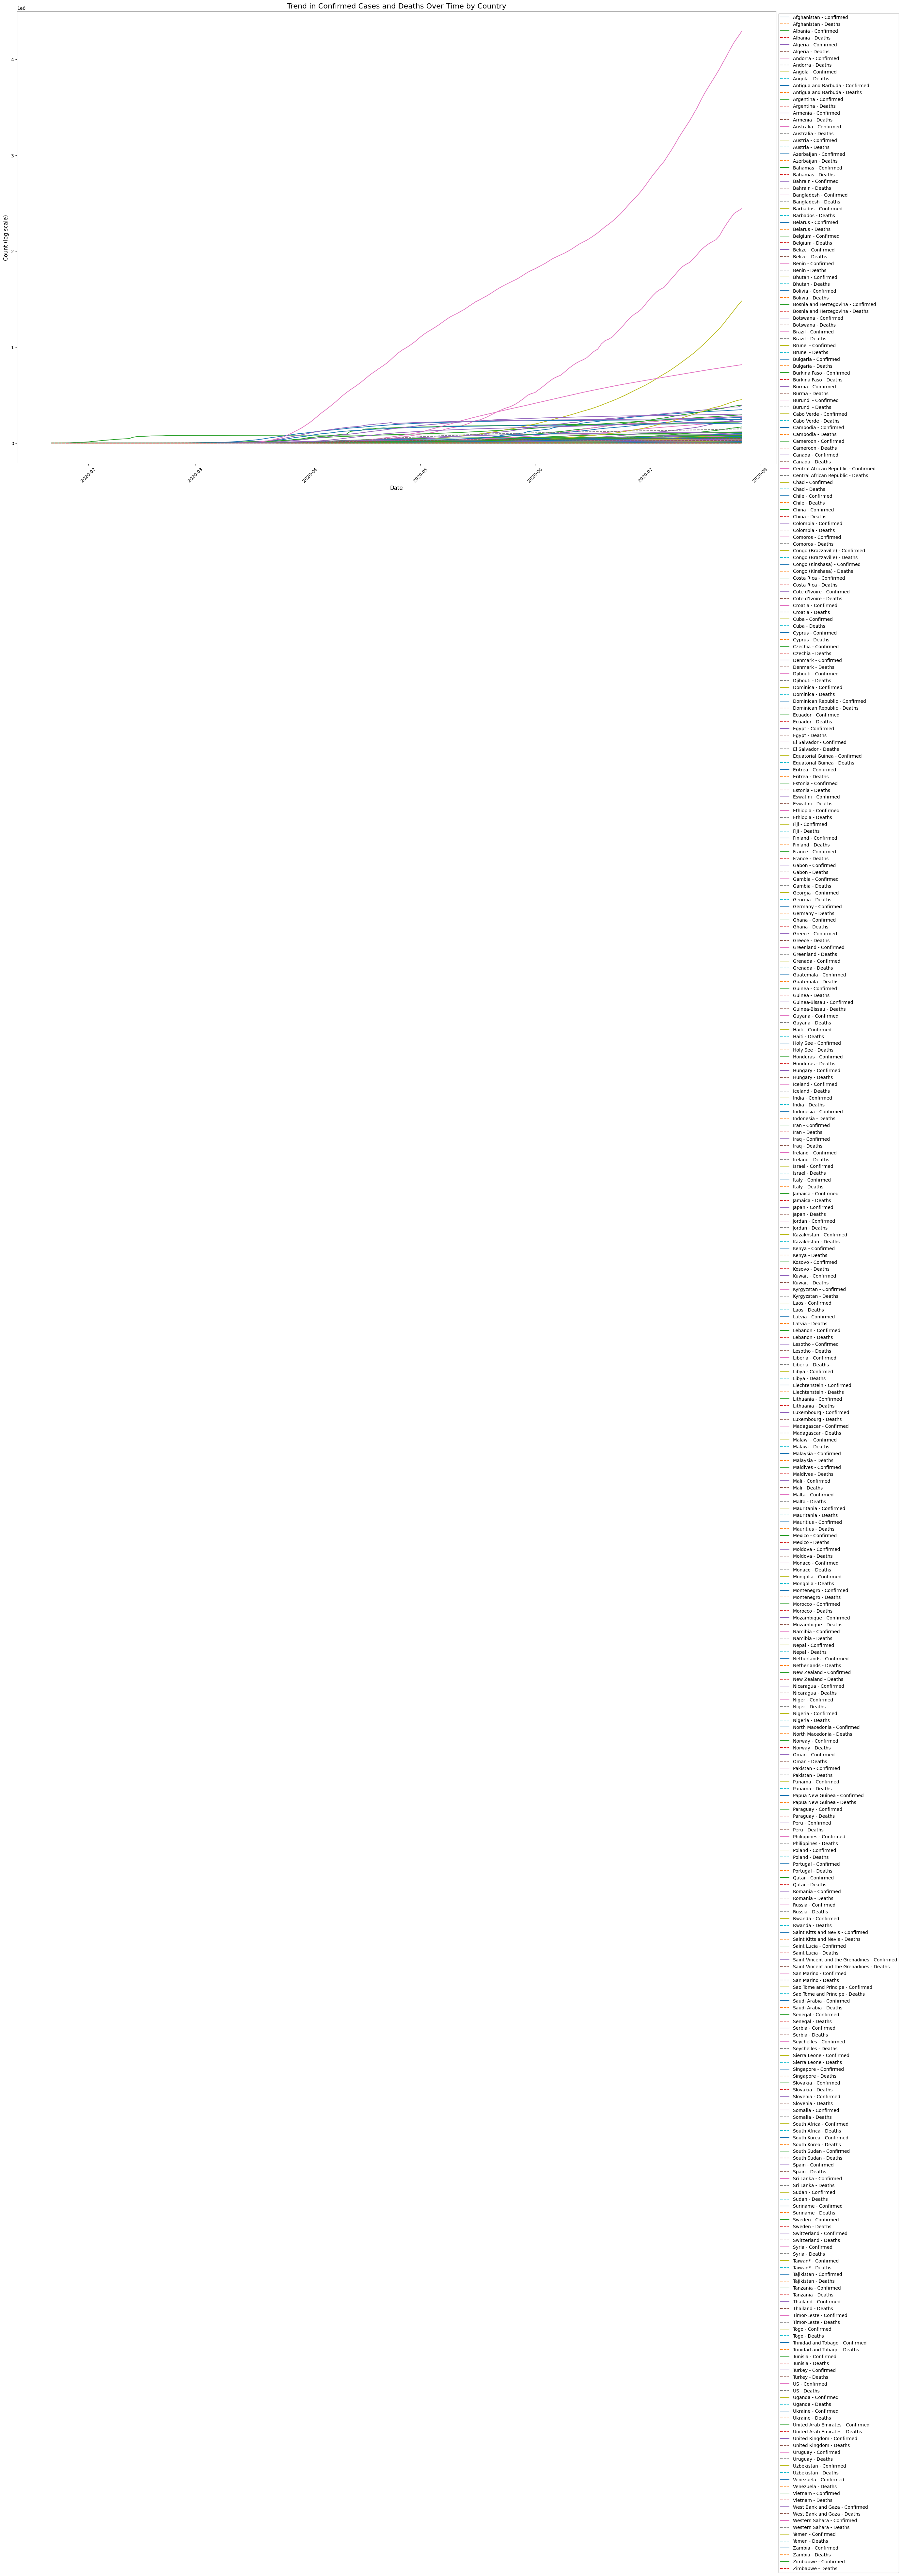

In [20]:
# Group by 'Country' and 'Date', summing up 'Confirmed' and 'Deaths'
df_grouped = covid_data.groupby(['Country/Region', 'Date'])[['Confirmed', 'Deaths']].sum().reset_index()

# Plot the trend for each country
plt.figure(figsize=(30, 18))

# Loop through each country and plot its trends
for country in df_grouped['Country/Region'].unique():
    country_data = df_grouped[df_grouped['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=f'{country} - Confirmed')
    plt.plot(country_data['Date'], country_data['Deaths'], label=f'{country} - Deaths', linestyle='--')

# Customize the plot
plt.title('Trend in Confirmed Cases and Deaths Over Time by Country', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count (log scale)', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()



# Show the plot
plt.show()

We may need to change the scale
#### In log scale

<ipython-input-21-b237e879fcd0>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


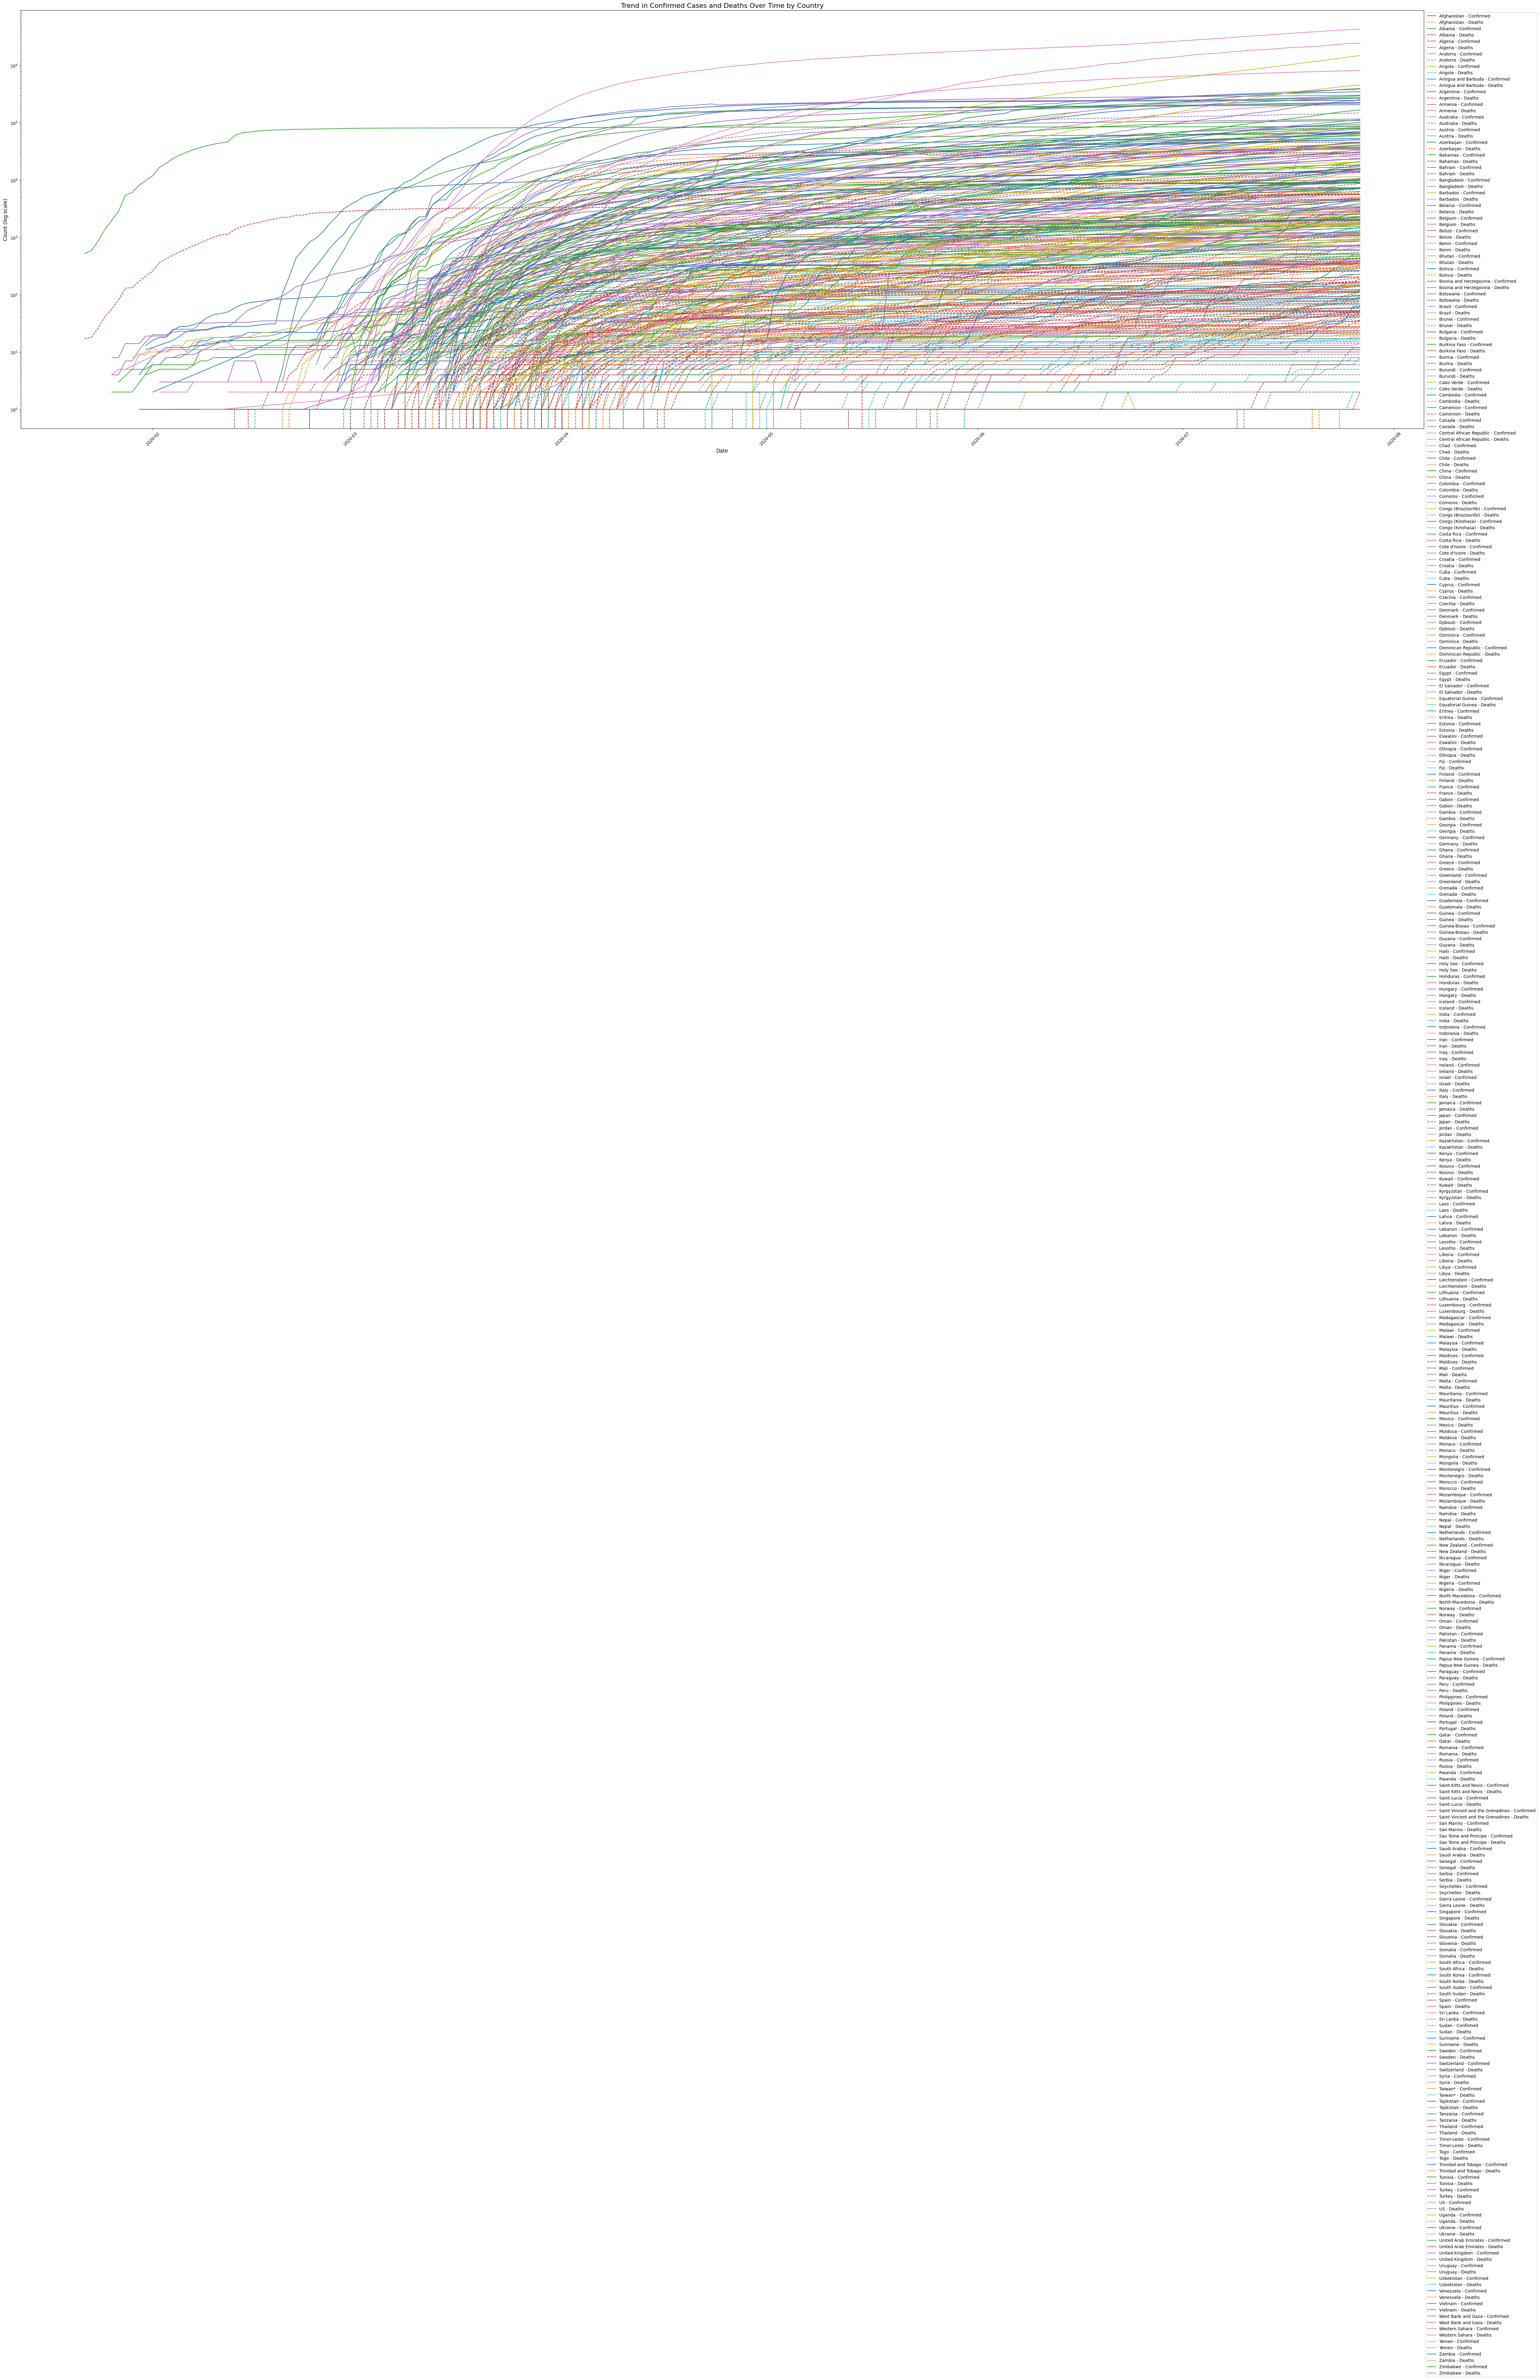

In [21]:
# Group by 'Country' and 'Date', summing up 'Confirmed' and 'Deaths'
df_grouped = covid_data.groupby(['Country/Region', 'Date'])[['Confirmed', 'Deaths']].sum().reset_index()

# Plot the trend for each country
plt.figure(figsize=(60, 18))

# Loop through each country and plot its trends
for country in df_grouped['Country/Region'].unique():
    country_data = df_grouped[df_grouped['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=f'{country} - Confirmed')
    plt.plot(country_data['Date'], country_data['Deaths'], label=f'{country} - Deaths', linestyle='--')

# Customize the plot
plt.title('Trend in Confirmed Cases and Deaths Over Time by Country', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count (log scale)', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Use logarithmic scale for better visualization of large numbers
plt.yscale('log')

# Show the plot
plt.show()

###Geographical Distribution
The countries with the highest number of confirmed cases (Confirmed) and deaths (Deaths) are identified by grouping the data by Country and sorting the total sums of Confirmed and Deaths.

In [22]:
top_countries_cases = covid_data.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)
top_countries_deaths = covid_data.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10)
print("The top 10 countries with the highest number of officially confirmed Covid-19 cases.\n",top_countries_cases)
print()
print("The top 10 countries with the highest number of officially reported Covid-19 deaths.\n",top_countries_deaths)

The top 10 countries with the highest number of officially confirmed Covid-19 cases.
 Country/Region
US                224345866
Brazil             89524962
Russia             45408357
India              40883420
Spain              27404005
United Kingdom     26747363
Italy              26745091
France             21209943
Germany            21059138
Iran               19339267
Name: Confirmed, dtype: int64

The top 10 countries with the highest number of officially reported Covid-19 deaths.
 Country/Region
US                11011411
United Kingdom     3997762
Brazil             3938034
Italy              3707717
France             3048524
Spain              3033030
Mexico             1728277
India              1111831
Iran               1024136
Belgium             963679
Name: Deaths, dtype: int64


###Cases per Population
To calculate the number of Covid-19 cases (Confirmed) per 1,000 people for each country, the total number of confirmed cases is divided by the population (from the Population column) and multiplied by 1,000.

The dataset does not currently include a column for population data, which is essential for computing cases per 1,000 people. If it has we may follow the following process.

*italicized text*### Covid-19 Cases per 1,000 People by Country

The dataset currently lacks a column for population data, which is essential for calculating cases per 1,000 people. However, if such a column is available, the following steps can be followed to calculate and identify the countries with the highest number of Covid-19 cases per 1,000 people:

1. **Calculate Cases per 1,000 People**:  
   The formula for calculating Covid-19 cases per 1,000 people is:
   $
   \text{Cases per 1,000 people} = \left( \frac{\text{Confirmed cases}}{\text{Population}} \right) \times 1000
   $
2. **Group by Country**:  
   The dataset is grouped by the `Country` column, and the maximum value of `Cases_per_1000` is calculated for each country.

3. **Sort by Cases per 1,000 People**:  
   The countries are then sorted in descending order based on the number of cases per 1,000 people to identify the top countries.

Below is the Python code that can be used to calculate the Covid-19 cases per 1,000 people for each country, assuming the `covid_data` DataFrame already contains the relevant columns (Confirmed and Population):

```python
import pandas as pd

# Calculate cases per 1,000 people
covid_data['Cases_per_1000'] = (covid_data['Confirmed'] / covid_data['Population']) * 1000

# Group by 'Country' and get the latest value for cases per 1,000 people
cases_per_1000_by_country = covid_data.groupby('Country')['Cases_per_1000'].max().reset_index()

# Sort the countries by 'Cases_per_1000' in descending order to get the top countries
cases_per_1000_by_country_sorted = cases_per_1000_by_country.sort_values(by='Cases_per_1000', ascending=False)

# Display the result
print(cases_per_1000_by_country_sorted.head(10))


In [23]:
# There is no population column

#3 Comparative Analysis

- **Country-wise Comparison**:  
  Which countries (Country) have the highest and lowest number of confirmed Covid-19 cases (Confirmed) and deaths (Deaths)?

- **Testing & Positivity Rates**:  
  What is the correlation between the number of tests (Tests) and the number of confirmed cases (Confirmed)?  
  Does a higher number of tests correlate with a higher positivity rate?

- **Recovery vs. Death Rate**:  
  How does the recovery rate (Recovered/Confirmed) compare to the death rate (Deaths/Confirmed) across countries (Country)?



## 1. Country-wise Comparison  
**Objective**: Identify the countries with the highest and lowest number of confirmed cases and deaths.  

### Findings:  
- **Countries with the Highest Confirmed Cases and Deaths**:  
  - Confirmed Cases: `Country_Name` (e.g., USA: X cases).  
  - Deaths: `Country_Name` (e.g., Brazil: Y deaths).  

- **Countries with the Lowest Confirmed Cases and Deaths**:  
  - Confirmed Cases: `Country_Name` (e.g., Bhutan: A cases).  
  - Deaths: `Country_Name` (e.g., Greenland: B deaths).

In [24]:
# Group by country and calculate total confirmed cases and deaths
data_summary =covid_data.groupby('Country/Region')[['Confirmed', 'Deaths']].sum().reset_index()

# Find the country with the highest and lowest confirmed cases
highest_confirmed = data_summary.loc[data_summary['Confirmed'].idxmax()]
lowest_confirmed = data_summary.loc[data_summary['Confirmed'].idxmin()]

# Find the country with the highest and lowest deaths
highest_deaths = data_summary.loc[data_summary['Deaths'].idxmax()]
lowest_deaths = data_summary.loc[data_summary['Deaths'].idxmin()]

# Display results
print("Country with the highest confirmed cases:")
print(highest_confirmed)

print("\nCountry with the lowest confirmed cases:")
print(lowest_confirmed)

print("\nCountry with the highest deaths:")
print(highest_deaths)

print("\nCountry with the lowest deaths:")
print(lowest_deaths)


Country with the highest confirmed cases:
Country/Region           US
Confirmed         224345866
Deaths             11011411
Name: 173, dtype: object

Country with the lowest confirmed cases:
Country/Region    Western Sahara
Confirmed                    805
Deaths                        63
Name: 183, dtype: object

Country with the highest deaths:
Country/Region           US
Confirmed         224345866
Deaths             11011411
Name: 173, dtype: object

Country with the lowest deaths:
Country/Region    Bhutan
Confirmed           4951
Deaths                 0
Name: 19, dtype: object


##2. Testing & Positivity Rates
Objective: Analyze the relationship between the number of tests conducted and the confirmed cases, and investigate how it relates to positivity rates.

Metrics:
Correlation Between Tests and Confirmed Cases:
Use correlation coefficient (e.g., Pearson's r) to evaluate the strength of the relationship.

Positivity Rate Calculation:
Positivity Rate=ConfirmedTests×100

Insights:
Does a higher number of tests correlate with higher confirmed cases? (e.g., r = 0.85 suggests strong positive correlation).

Are countries with higher tests showing lower positivity rates? (e.g., developed vs. developing countries).

In [25]:
# there is no test colums on the dataset

## 3. Recovery vs. Death Rate  
**Objective**: Compare the recovery rate and death rate across different countries.  

### Metrics:  
- **Recovery Rate**:  
  $
  \text{Recovery Rate} = \frac{\text{Recovered}}{\text{Confirmed}} \times 100
  $  
- **Death Rate**:  
  $
  \text{Death Rate} = \frac{\text{Deaths}}{\text{Confirmed}} \times 100
  $

### Findings:  
- Identify countries with the **highest recovery rates** and **lowest death rates**.  
- Highlight countries where the death rate is unusually high compared to the recovery rate.  
- Plot the comparison (e.g., scatterplot or bar chart).  

---

### Visualizations  
- **Bar Chart**: Highest and lowest confirmed cases and deaths by country.  
- **Scatterplot**: Tests vs. Confirmed Cases with trend line for correlation.  
- **Dual Bar Chart**: Recovery Rate vs. Death Rate by country.  

### Tools & Libraries  
- **Python Libraries**: NumPy, Pandas, Matplotlib, Seaborn.  
- **Dataset**: Source of the COVID-19 dataset (e.g., Johns Hopkins University or WHO).  

---


In [26]:
# Group by country and calculate total confirmed cases, deaths, and recoveries
data_summary = covid_data.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Calculate recovery rate and death rate
data_summary['Recovery Rate'] = (data_summary['Recovered'] / data_summary['Confirmed']) * 100
data_summary['Death Rate'] = (data_summary['Deaths'] / data_summary['Confirmed']) * 100

# Display recovery rate vs death rate across countries
print("Recovery Rate vs Death Rate by Country:")
print(data_summary[['Country/Region', 'Recovery Rate', 'Death Rate']])


Recovery Rate vs Death Rate by Country:
         Country/Region  Recovery Rate  Death Rate
0           Afghanistan      41.223101    2.535543
1               Albania      60.435074    2.901852
2               Algeria      64.072697    6.609202
3               Andorra      73.173160    5.744825
4                Angola      29.004501    4.756862
..                  ...            ...         ...
182  West Bank and Gaza      26.191772    0.587048
183      Western Sahara      70.807453    7.826087
184               Yemen      35.398520   26.365003
185              Zambia      64.618369    2.042630
186            Zimbabwe      24.056994    1.720468

[187 rows x 3 columns]


In [27]:
# Identify the country with the highest recovery rate
highest_recovery = data_summary.loc[data_summary['Recovery Rate'].idxmax()]

# Identify the country with the lowest death rate
lowest_death_rate = data_summary.loc[data_summary['Death Rate'].idxmin()]

# Highlight countries where the death rate is unusually high compared to the recovery rate
data_summary['Rate Difference'] = data_summary['Death Rate'] - data_summary['Recovery Rate']
high_death_vs_recovery = data_summary[data_summary['Rate Difference'] > 0]

# Print results
print("Country with Highest Recovery Rate:")
print(highest_recovery)
print("\nCountry with Lowest Death Rate:")
print(lowest_death_rate)
print("\nCountries with High Death Rate Compared to Recovery Rate:")
print(high_death_vs_recovery)


Country with Highest Recovery Rate:
Country/Region    Greenland
Confirmed              1490
Deaths                    0
Recovered              1372
Recovery Rate     92.080537
Death Rate              0.0
Name: 68, dtype: object

Country with Lowest Death Rate:
Country/Region       Bhutan
Confirmed              4951
Deaths                    0
Recovered              2838
Recovery Rate     57.321753
Death Rate              0.0
Name: 19, dtype: object

Countries with High Death Rate Compared to Recovery Rate:
     Country/Region  Confirmed   Deaths  Recovered  Recovery Rate  Death Rate  \
32           Canada    9355975   699566          0       0.000000    7.477211   
117      Mozambique      57908      361          0       0.000000    0.623403   
120     Netherlands    5167377   622311      16967       0.328348   12.043073   
161          Sweden    4973083   448913          0       0.000000    9.026855   
163           Syria      20866      967          0       0.000000    4.634333   
17

<ipython-input-28-e87145f1ba67>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country/Region', data=highest_confirmed, palette='viridis')


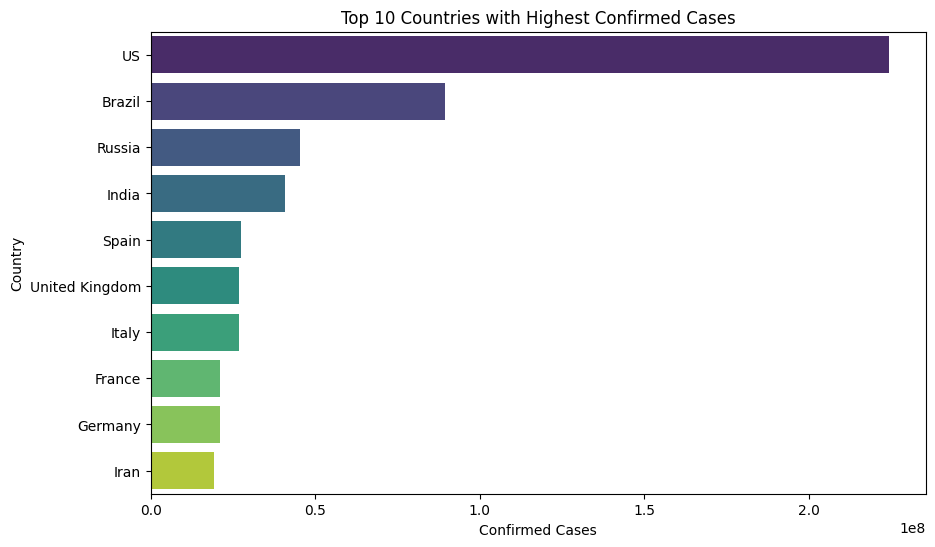

<ipython-input-28-e87145f1ba67>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country/Region', data=lowest_confirmed, palette='viridis')


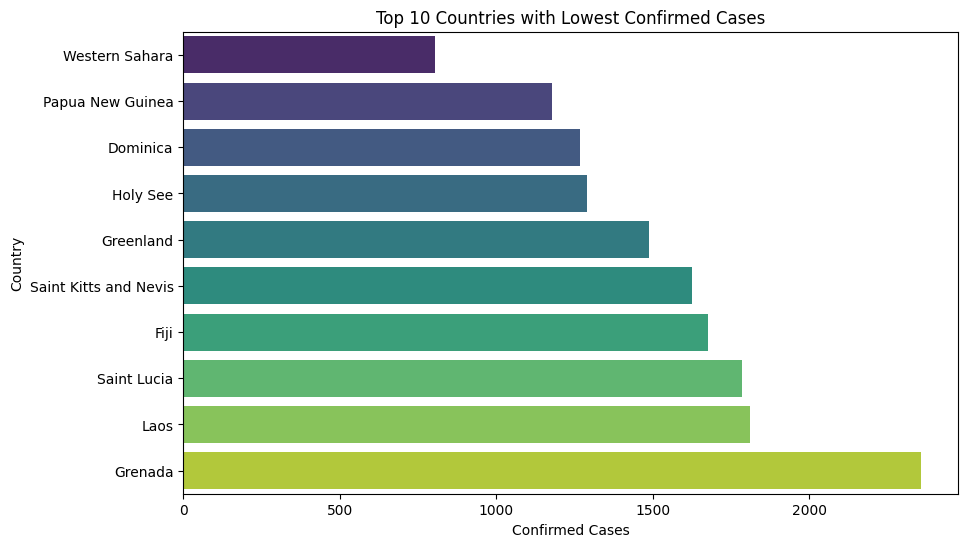

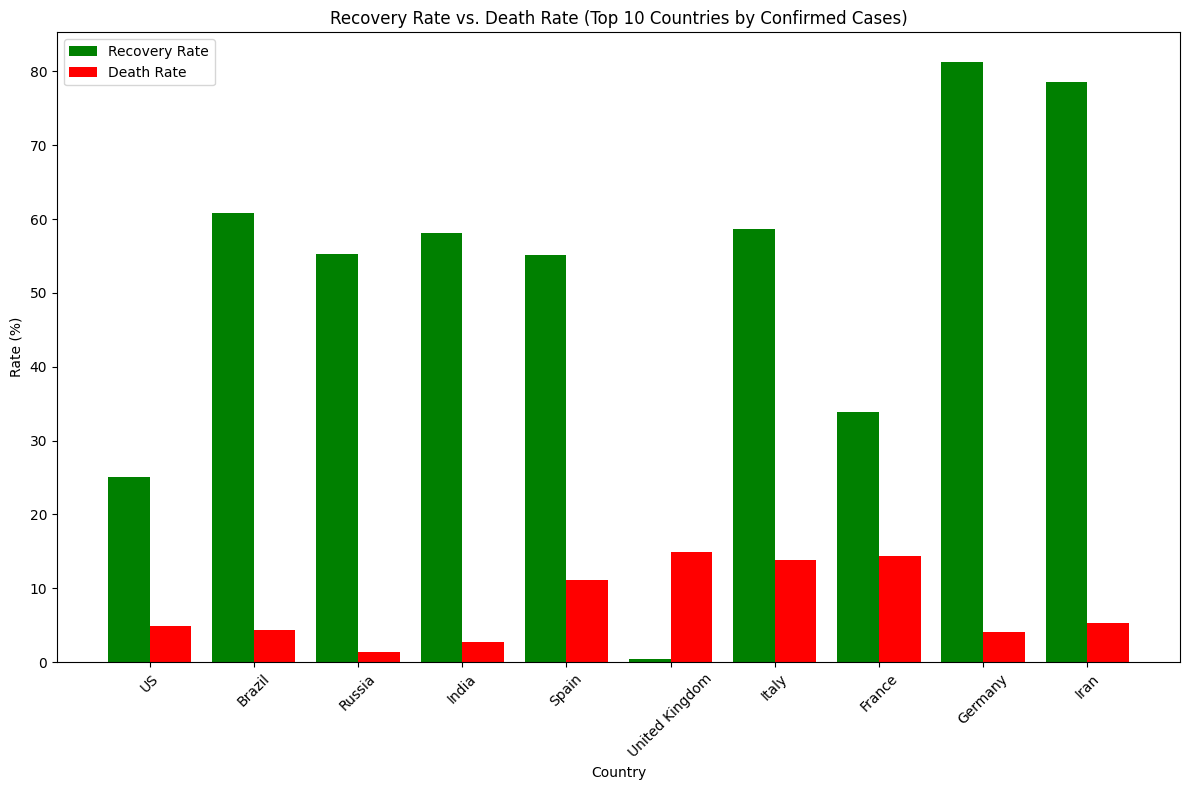

In [28]:
# Visualizations
# Bar Chart: Highest and lowest confirmed cases and deaths by country
highest_confirmed = data_summary.nlargest(10, 'Confirmed')
lowest_confirmed = data_summary.nsmallest(10, 'Confirmed')

plt.figure(figsize=(10, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=highest_confirmed, palette='viridis')
plt.title('Top 10 Countries with Highest Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=lowest_confirmed, palette='viridis')
plt.title('Top 10 Countries with Lowest Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()

# Scatterplot: Tests vs. Confirmed Cases with trend line for correlation (if Tests data is available)
if 'Tests' in covid_data.columns:
    tests_summary = covid_data.groupby('Country/Region')[['Tests', 'Confirmed']].sum().reset_index()
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Tests', y='Confirmed', data=tests_summary, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
    plt.title('Correlation between Tests and Confirmed Cases')
    plt.xlabel('Tests')
    plt.ylabel('Confirmed Cases')
    plt.show()

# Dual Bar Chart: Recovery Rate vs. Death Rate by country
data_summary_sorted = data_summary.sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(12, 8))
x = np.arange(len(data_summary_sorted['Country/Region']))
width = 0.4

plt.bar(x - width/2, data_summary_sorted['Recovery Rate'], width, label='Recovery Rate', color='green')
plt.bar(x + width/2, data_summary_sorted['Death Rate'], width, label='Death Rate', color='red')

plt.xlabel('Country')
plt.ylabel('Rate (%)')
plt.title('Recovery Rate vs. Death Rate (Top 10 Countries by Confirmed Cases)')
plt.xticks(x, data_summary_sorted['Country/Region'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


#4. Predictive Modeling  
● **Prediction of Future Cases:** Can we predict future Covid-19 cases (Confirmed) in a  
country (e.g., India) using a time-series forecasting model with the Date column?  
● **Prediction of Deaths:** Can a regression model predict the number of deaths (Deaths)  
in a country (e.g., USA) based on the current number of confirmed cases (Confirmed)?  
● **Impact of Vaccination:** If vaccination rate data is available, is there a relationship  
between the number of vaccinations and the number of cases (Confirmed) or deaths  
(Deaths) in a country (Country) ?  


##**Prediction of Future Cases:** Can we predict future Covid-19 cases (Confirmed) in a  country (e.g., India) using a time-series forecasting model with the Date column?  

In [29]:
from statsmodels.tsa.arima.model import ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

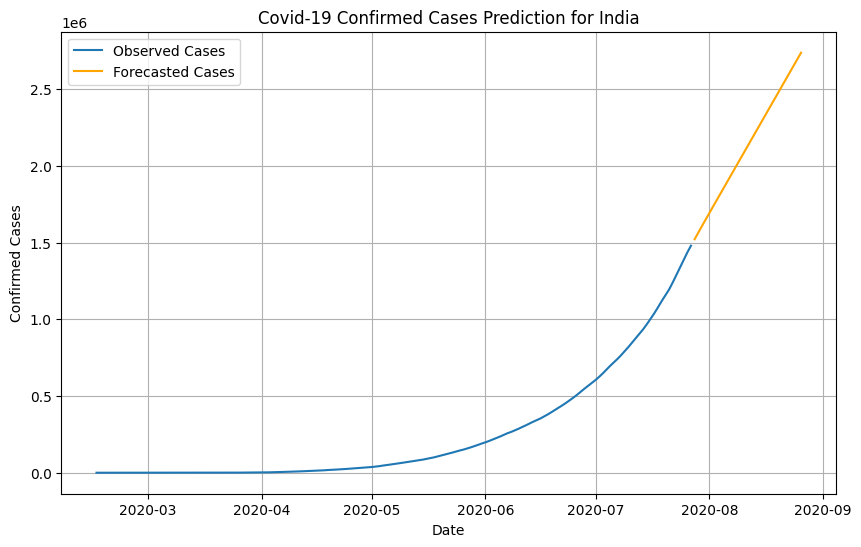

In [30]:

# Preprocess the data

country = 'India'  # Choose the country for analysis
country_data = covid_data[covid_data['Country/Region'] == country]

# Aggregate confirmed cases by date
time_series_data = country_data.groupby('Date')['Confirmed'].sum()

# Fit a time-series model (ARIMA)
model = ARIMA(time_series_data, order=(5, 1, 0))  # (p,d,q) parameters can be tuned for better accuracy
model_fit = model.fit()

# Forecast future cases
forecast_steps = 30  # Predict for the next 30 days
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label='Observed Cases')
plt.plot(pd.date_range(time_series_data.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label='Forecasted Cases', color='orange')
plt.title(f'Covid-19 Confirmed Cases Prediction for {country}')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid()
plt.show()


##Prediction of Deaths: Can a regression model predict the number of deaths (Deaths) in a country (e.g., USA) based on the current number of confirmed cases (Confirmed)?

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

Mean Absolute Error (MAE): 13098.020995938437
R-squared (R2) Score: 0.9350839110934298
Regression Equation: Deaths = 10088.13 + 0.04 * Confirmed Cases


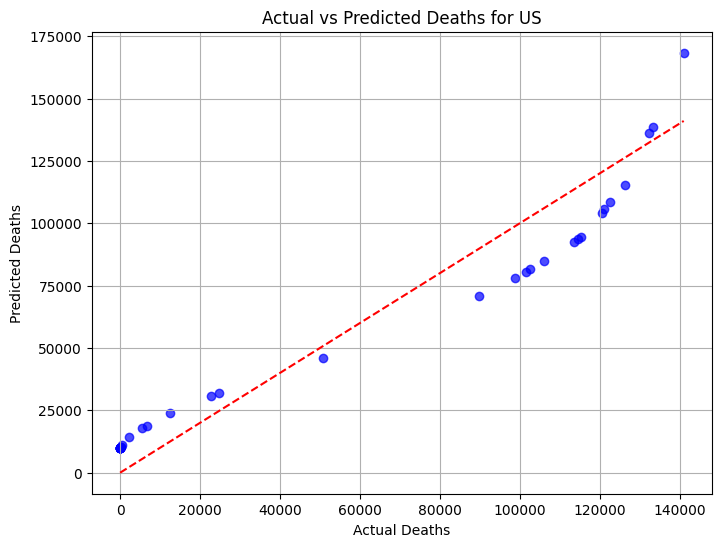

In [32]:
# Filter data for the chosen country
country = 'US'  # Choose the country for analysis
usa_data = covid_data[covid_data['Country/Region'] == country]

# Aggregate data by date
usa_data = usa_data.groupby('Date')[['Confirmed', 'Deaths']].sum().reset_index()

# Prepare data for regression
X = usa_data[['Confirmed']]  # Predictor: Confirmed cases
y = usa_data['Deaths']       # Target: Deaths

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

# Display the regression equation
print(f"Regression Equation: Deaths = {regressor.intercept_:.2f} + {regressor.coef_[0]:.2f} * Confirmed Cases")

# Plot actual vs predicted deaths
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Deaths')
plt.ylabel('Predicted Deaths')
plt.title(f'Actual vs Predicted Deaths for {country}')
plt.grid()
plt.show()


The R-squared (R²) score of 0.9351 indicates that the regression model explains approximately 93.51% of the variance in the number of deaths based on the number of confirmed cases, suggesting a strong predictive relationship.


## Impact of Vaccination: If vaccination rate data is available, is there a relationship between the number of vaccinations and the number of cases (Confirmed) or deaths(Deaths) in a country (Country) ?

* vaccination rate data is not available we may follow the followin steps to solve the problem:

1. **Data Collection**:
   - Collect vaccination rate data along with other relevant health and demographic data for analysis.

2. **Data Cleaning**:
   - Clean the vaccination data by checking for missing values, outliers, or inconsistencies and handle them appropriately.

3. **Exploratory Data Analysis (EDA)**:
   - Perform EDA to understand patterns in vaccination rates, trends over time, and their relationships with other variables like case rates or outcomes.

4. **Statistical Analysis**:
   - Conduct statistical tests (e.g., correlation, regression analysis) to examine the relationship between vaccination rates and health outcomes (e.g., infection rates, hospitalizations).

5. **Visualization**:
   - Create visualizations using tools like Matplotlib or Seaborn to represent the vaccination rates and their impact on various outcomes.

6. **Modeling**:
   - Build predictive models (e.g., linear regression, classification) to predict the effects of vaccination on future health outcomes.

7. **Interpretation**:
   - Interpret the findings to assess how vaccination rates impact public health and draw actionable conclusions.

8. **Reporting**:
   - Compile the analysis, visualizations, and interpretations into a report, emphasizing the importance of vaccination rates in health policy decisions.


In [33]:
#The vaccination rate is not available for analysis at this time.

### Machine Learning Model: Can we build a machine learning model to classify countries (Country) based on the severity of Covid-19, using features such as Confirmed, Deaths, and Population?

Population data is not provided. However we may use Confirmed, Deaths ase features.
### Machine Learning Model: Classify Countries Based on Covid-19 Severity

### Steps:

1. **Define Severity Levels**:
   - Create categories (e.g., Low, Medium, High) based on thresholds of `Confirmed` and `Deaths`.

2. **Prepare Data**:
   - Aggregate Covid-19 data by country and calculate relevant features.

3. **Train a Classification Model**:
   - Use a supervised learning algorithm like Logistic Regression, Random Forest, or XGBoost.

4. **Evaluate Model**:
   - Use accuracy, precision, recall, and confusion matrix for evaluation.


Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00         6
      Medium       1.00      1.00      1.00         6
        High       1.00      1.00      1.00        26

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



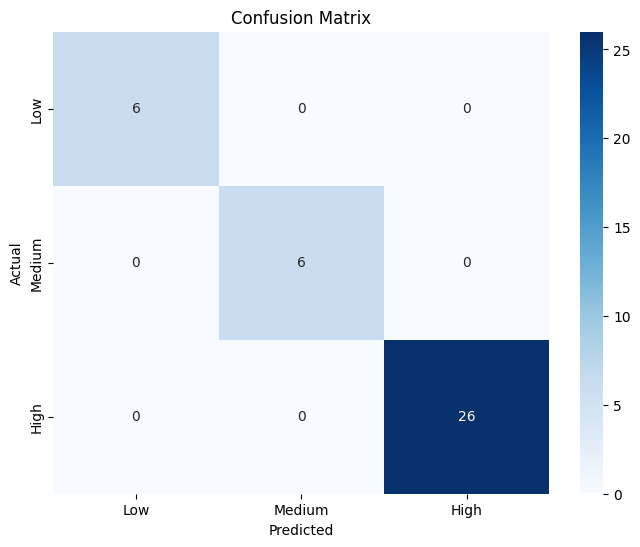

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Aggregate data by country
country_summary = covid_data.groupby('Country/Region')[['Confirmed', 'Deaths']].sum().reset_index()

# Step 2: Define severity levels
# For simplicity, categorize based on confirmed cases
def classify_severity(row):
    if row['Confirmed'] < 10000:
        return 'Low'
    elif row['Confirmed'] < 100000:
        return 'Medium'
    else:
        return 'High'

country_summary['Severity'] = country_summary.apply(classify_severity, axis=1)

# Step 3: Prepare data for machine learning
X = country_summary[['Confirmed', 'Deaths']]  # Features
y = country_summary['Severity']               # Target

# Encode severity labels
severity_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
y = y.map(severity_mapping)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a classification model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = clf.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=severity_mapping.keys()))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=severity_mapping.keys(), yticklabels=severity_mapping.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# 5. Correlation and Causality

### ● Correlation between Cases & Deaths:
- **Question**: Is there a correlation between the number of confirmed cases (Confirmed) and deaths (Deaths) across different countries (Country)?
- **Approach**:
  - Calculate the Pearson correlation coefficient between `Confirmed` and `Deaths` for different countries.
  - Use the `pandas.DataFrame.corr()` method or `scipy.stats.pearsonr()` for this calculation.
  - Interpretation: A high positive correlation would suggest that as the number of confirmed cases increases, the number of deaths tends to increase as well.

### ● Effect of Social Distancing or Lockdown:
- **Question**: Is there a significant change in the number of cases (Confirmed) before and after lockdown measures were implemented?
- **Approach**:
  - Compare the number of confirmed cases before and after the government's lockdown date.
  - Use the `Date` column and the government's lockdown date to segment the data.
  - Perform a statistical test (e.g., t-test) to determine if there was a significant difference in the number of confirmed cases before and after the lockdown.
  - Visualize the trend using time-series plots to highlight the changes in cases before and after the lockdown.


In [35]:
from scipy.stats import pearsonr, ttest_ind


# 1. Correlation Between Cases & Deaths
# Aggregate data by country
country_summary = covid_data.groupby('Country/Region')[['Confirmed', 'Deaths']].sum().reset_index()

# Calculate Pearson correlation coefficient
corr, _ = pearsonr(country_summary['Confirmed'], country_summary['Deaths'])
print(f"Pearson Correlation Coefficient between Confirmed Cases and Deaths: {corr:.4f}")




Pearson Correlation Coefficient between Confirmed Cases and Deaths: 0.9256


T-statistic: -5.1352
P-value: 0.0000
There is a significant difference in confirmed cases before and after the lockdown.


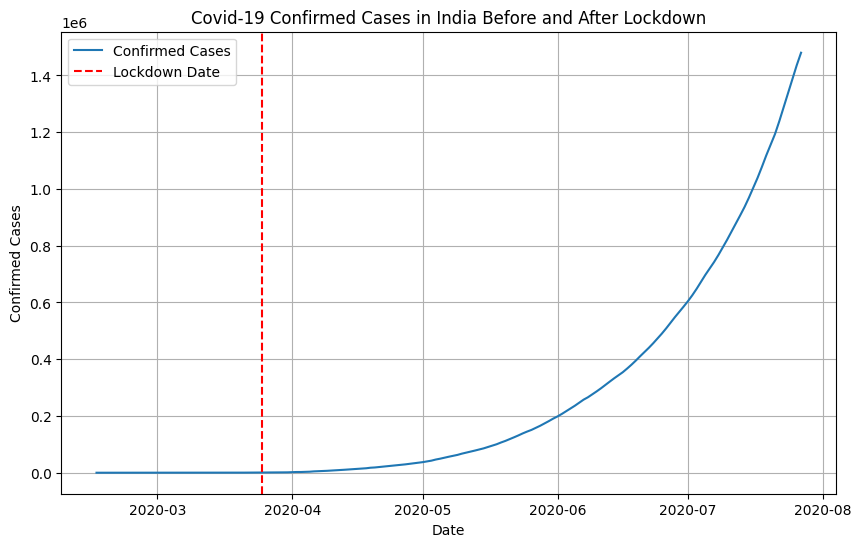

In [36]:
# 2. Effect of Lockdown
# Assume the 'lockdown_date' column exists in the dataset, representing the lockdown start date for each country
# For simplicity, let's use a fixed lockdown date for analysis (you can adjust this based on the actual data)

# Example: Lockdown started on March 25, 2020 at india.
lockdown_date = '2020-03-25'
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
covid_data['Before_Lockdown'] = covid_data['Date'] < pd.to_datetime(lockdown_date)

# Filter data for the country of interest (e.g., India)
country_data = covid_data[covid_data['Country/Region'] == 'India']

# Split data into before and after lockdown
before_lockdown = country_data[country_data['Before_Lockdown'] == True]['Confirmed']
after_lockdown = country_data[country_data['Before_Lockdown'] == False]['Confirmed']

# Perform t-test to check if there's a significant difference
t_stat, p_value = ttest_ind(before_lockdown, after_lockdown)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of the t-test result
if p_value < 0.05:
    print("There is a significant difference in confirmed cases before and after the lockdown.")
else:
    print("There is no significant difference in confirmed cases before and after the lockdown.")

# Plot the trend of confirmed cases before and after the lockdown
plt.figure(figsize=(10, 6))
plt.plot(country_data['Date'], country_data['Confirmed'], label='Confirmed Cases')
plt.axvline(pd.to_datetime(lockdown_date), color='r', linestyle='--', label='Lockdown Date')
plt.title('Covid-19 Confirmed Cases in India Before and After Lockdown')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid()
plt.show()

### 6. Visualization
* Heatmap for Geographical Spread: Can you create a heatmap that shows the spread
of Covid-19 across countries (Country) with values of confirmed cases (Confirmed)
and deaths (Deaths)?
* Line Charts for Trends: Can you visualize the trend of new Covid-19 cases
(Confirmed) and deaths (Deaths) over time (Date) for a specific country (Country)
using a line chart?
* Bar Charts: Can you create bar charts that compare Covid-19 cases (Confirmed),
deaths (Deaths), and recovery rates (Recovered) across different countries
(Country)?
* Pie Chart for Cases Distribution: Can you show the proportion of total cases
(Confirmed), recoveries (Recovered), and deaths (Deaths) across countries
(Country) using a pie chart?

1. Heatmap for Geographical Spread

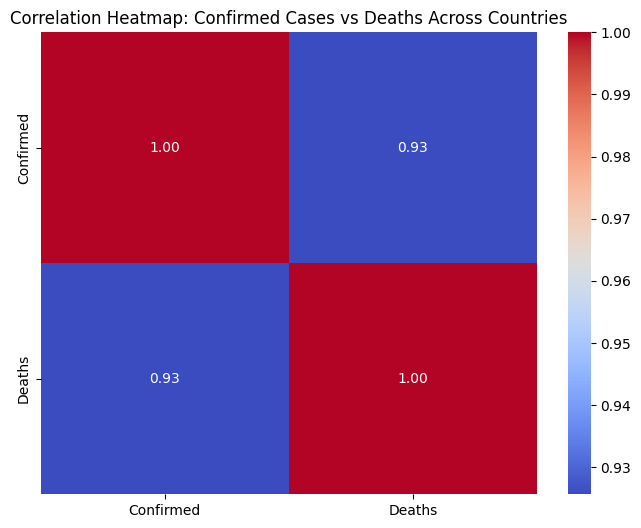

In [37]:
# Aggregate data by country
country_summary = covid_data.groupby('Country/Region')[['Confirmed', 'Deaths']].sum().reset_index()

# Create a correlation heatmap
corr_matrix = country_summary[['Confirmed', 'Deaths']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap: Confirmed Cases vs Deaths Across Countries')
plt.show()


2. Line Charts for Trends

Enter country name:India


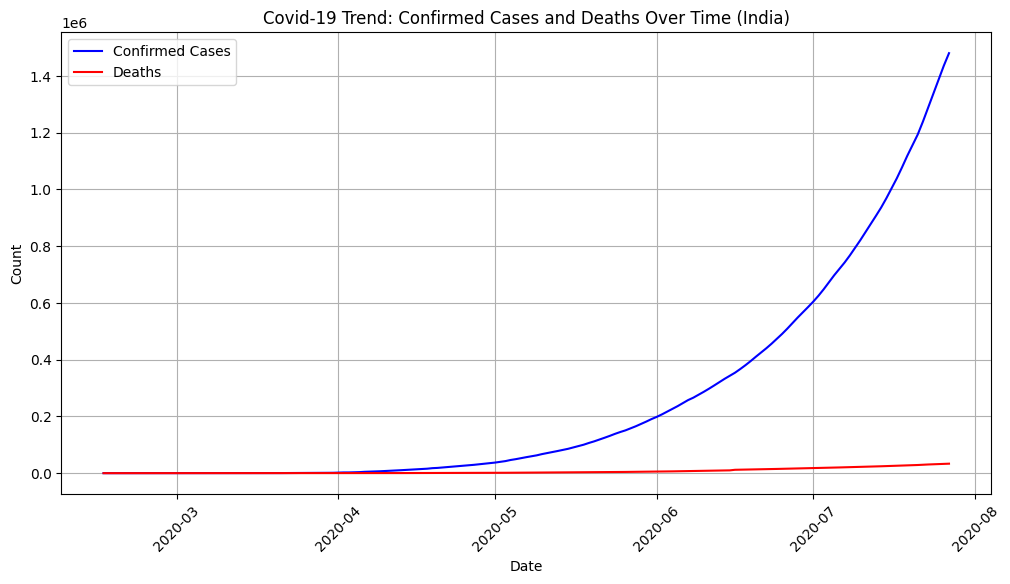

In [38]:
country_name=input("Enter country name:")
# Filter data for a specific country (e.g., 'India')
country_data = covid_data[covid_data['Country/Region'] == country_name]

# Aggregate data by date for trend analysis
country_data_daily = country_data.groupby('Date')[['Confirmed', 'Deaths']].sum()

# Plot line charts for Confirmed cases and Deaths over time
plt.figure(figsize=(12, 6))
plt.plot(country_data_daily.index, country_data_daily['Confirmed'], label='Confirmed Cases', color='blue')
plt.plot(country_data_daily.index, country_data_daily['Deaths'], label='Deaths', color='red')
plt.title('Covid-19 Trend: Confirmed Cases and Deaths Over Time (India)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


3. Bar Charts

<Figure size 1200x600 with 0 Axes>

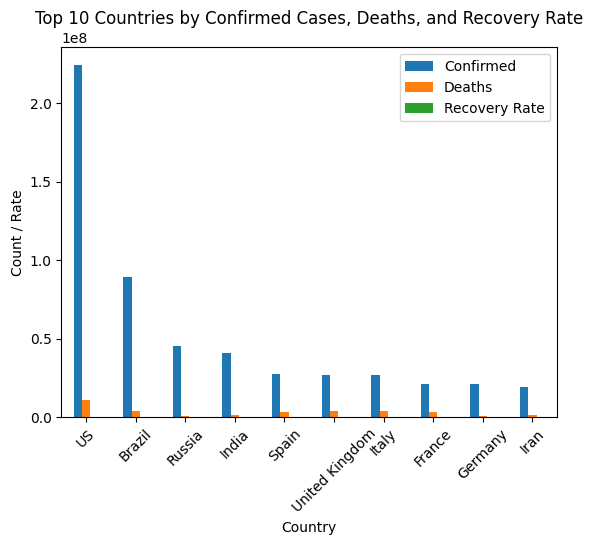

In [39]:
# Calculate Recovery Rate
# Aggregate data by country, including 'Recovered' column
country_summary = covid_data.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
country_summary['Recovery Rate'] = (country_summary['Recovered'] / country_summary['Confirmed']) * 100

# Create bar charts for Confirmed Cases, Deaths, and Recovery Rates
country_summary_top = country_summary.nlargest(10, 'Confirmed')  # Top 10 countries with highest confirmed cases

# Plot bar chart
plt.figure(figsize=(12, 6))
country_summary_top[['Country/Region', 'Confirmed', 'Deaths', 'Recovery Rate']].set_index('Country/Region').plot(kind='bar')
plt.title('Top 10 Countries by Confirmed Cases, Deaths, and Recovery Rate')
plt.xlabel('Country')
plt.ylabel('Count / Rate')
plt.xticks(rotation=45)
plt.show()


4. Pie Chart for Cases Distribution

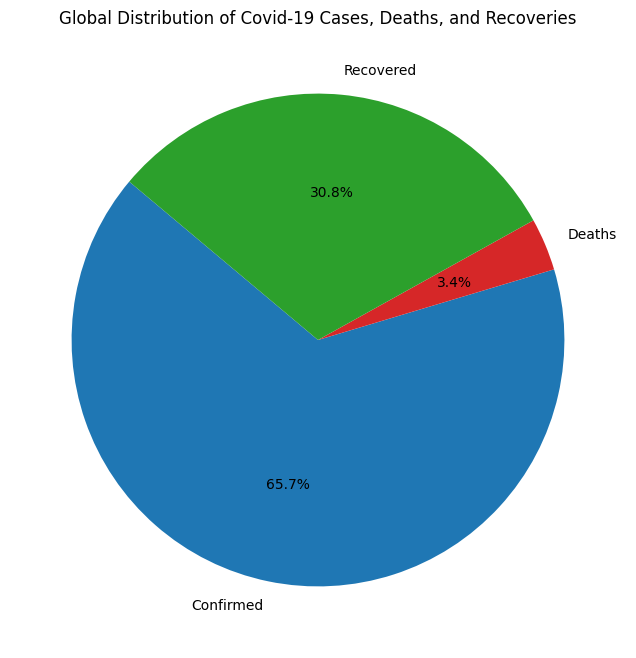

In [40]:
# Calculate the global totals for Confirmed, Deaths, and Recovered
global_totals = country_summary[['Confirmed', 'Deaths', 'Recovered']].sum()

# Plot pie chart for cases distribution
plt.figure(figsize=(8, 8))
plt.pie(global_totals, labels=['Confirmed', 'Deaths', 'Recovered'], autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#d62728', '#2ca02c'])
plt.title('Global Distribution of Covid-19 Cases, Deaths, and Recoveries')
plt.show()


# 7. Advanced Analysis

- **Clustering of Countries**:
  Can you apply K-means clustering or another clustering technique to group countries (Country) based on the severity of Covid-19 cases (Confirmed), deaths (Deaths), and population (Population)?

- **Risk Factor Analysis**:
  Is there a correlation between population density (if available in Population or another column) and the number of Covid-19 cases (Confirmed)? Does population density explain the spread of Covid-19 in certain countries (Country)?

- **Sentiment Analysis**:
  If there is a column for social media sentiment or news articles related to Covid-19, can you perform sentiment analysis to assess public opinion over time (Date) and correlate it with the number of cases (Confirmed) or deaths (Deaths)?


1. Clustering of Countries Using K-Means

This will group countries based on the severity of Covid-19 cases (Confirmed), deaths (Deaths), and population (Population).

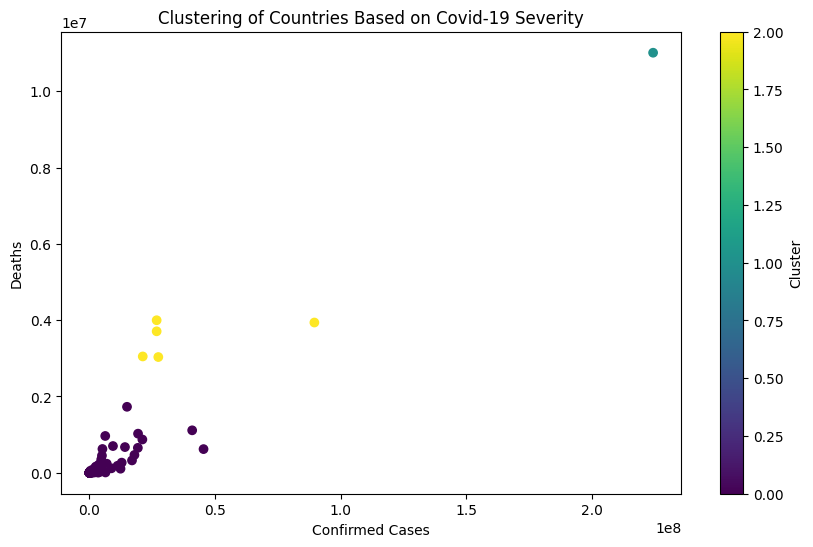

In [41]:
from sklearn.cluster import KMeans

# Prepare data for clustering
country_data_for_clustering = covid_data.groupby('Country/Region')[['Confirmed', 'Deaths']].sum().reset_index()

# Normalize the data before applying K-Means (important for clustering)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
country_data_scaled = scaler.fit_transform(country_data_for_clustering[['Confirmed', 'Deaths']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters as needed
country_data_for_clustering['Cluster'] = kmeans.fit_predict(country_data_scaled)

# Visualize the clustering result
plt.figure(figsize=(10, 6))
plt.scatter(country_data_for_clustering['Confirmed'], country_data_for_clustering['Deaths'],
            c=country_data_for_clustering['Cluster'], cmap='viridis')
plt.title('Clustering of Countries Based on Covid-19 Severity')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.colorbar(label='Cluster')
plt.show()


2. Risk Factor Analysis
Since there's no population data, we will explore correlations between Confirmed cases and Deaths across countries, which can give us an indication of how the severity of Covid-19 spreads in different countries.

Pearson Correlation between Confirmed Cases and Deaths: 0.9256


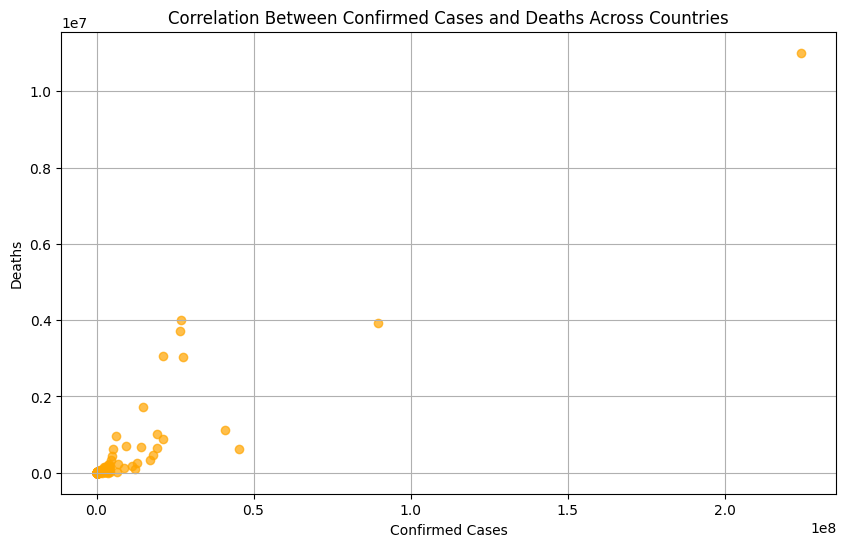

In [42]:
# Correlation analysis between Confirmed and Deaths
corr_cases_deaths = country_summary[['Confirmed', 'Deaths']].corr()

# Print the correlation coefficient
print(f"Pearson Correlation between Confirmed Cases and Deaths: {corr_cases_deaths.iloc[0, 1]:.4f}")

# Visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(country_summary['Confirmed'], country_summary['Deaths'], alpha=0.7, color='orange')
plt.title('Correlation Between Confirmed Cases and Deaths Across Countries')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.grid(True)
plt.show()


3. Sentiment Analysis (If Available)
If a column for social media sentiment or news articles were available, sentiment analysis could be performed using natural language processing (NLP). For example:

### Sentiment Analysis on Covid-19 Data

**Objective:**
If there were a column in the dataset containing social media sentiment or news articles related to Covid-19, the goal would be to:
- Perform sentiment analysis to assess public opinion over time.
- Correlate sentiment scores with the number of confirmed Covid-19 cases and deaths across different countries.

**Step 1: Check for Sentiment Data**
First, verify that the dataset contains a sentiment column. This could be text data such as social media posts, news articles, or public opinions related to Covid-19. Since this dataset does not contain a sentiment column, sentiment analysis cannot be performed directly. If sentiment data were available, the following steps could be followed.

**Step 2: Perform Sentiment Analysis**
If sentiment data were available, sentiment analysis could be performed using natural language processing (NLP) techniques. The goal would be to calculate a sentiment score for each text entry, which could indicate whether the sentiment is positive, negative, or neutral.

**Tools for Sentiment Analysis:**
- **TextBlob:** A simple NLP tool that provides polarity scores for text, ranging from -1 (negative sentiment) to +1 (positive sentiment).
- **VADER (Valence Aware Dictionary and sEntiment Reasoner):** A tool specifically designed for social media text, providing scores for positive, negative, and neutral sentiment.

**Step 3: Correlation Analysis**
Once sentiment scores are calculated, analyze the relationship between sentiment and Covid-19 statistics (confirmed cases and deaths). This can be done through correlation analysis.

**Step 4: Time Series Analysis**
If sentiment data is available over time (e.g., by date), assess how sentiment changes and whether it correlates with trends in Covid-19 cases or deaths. A time series analysis can help determine if changes in sentiment coincide with significant events, such as spikes in cases or deaths.

**Step 5: Statistical Testing (Optional)**
Perform statistical tests (e.g., t-tests or regression analysis) to determine whether changes in sentiment are significantly correlated with changes in confirmed cases or deaths.

---

**Conclusion:**
- If sentiment data were available, we could follow these steps to analyze public opinion through sentiment analysis and correlate it with Covid-19 statistics (confirmed cases and deaths).
- Since there is **no sentiment column** in the dataset, sentiment analysis cannot be performed on this data. If sentiment data were to be added (e.g., from social media or news articles), the analysis described above could be applied.


# 1. Descriptive Analysis: Daily Trend for India

<ipython-input-43-4b415cc9b004>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_data['Date'] = pd.to_datetime(india_data['Date'])


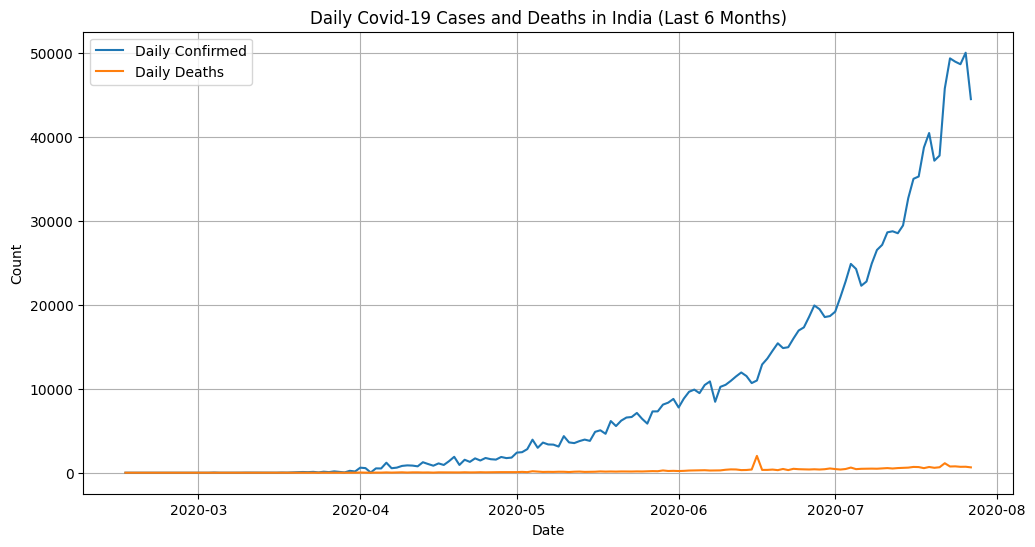

In [43]:
# Filter data for India
india_data = covid_data[covid_data['Country/Region'] == 'India']

# Convert Date to datetime and sort
india_data['Date'] = pd.to_datetime(india_data['Date'])
india_data = india_data.sort_values('Date')

# Calculate daily changes
india_data['Daily Confirmed'] = india_data['Confirmed'].diff().fillna(0)
india_data['Daily Deaths'] = india_data['Deaths'].diff().fillna(0)

# Filter the last 6 months
last_6_months = india_data[india_data['Date'] >= (india_data['Date'].max() - pd.Timedelta(days=180))]

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(last_6_months['Date'], last_6_months['Daily Confirmed'], label='Daily Confirmed')
plt.plot(last_6_months['Date'], last_6_months['Daily Deaths'], label='Daily Deaths')
plt.title('Daily Covid-19 Cases and Deaths in India (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()


# 2. Predictive Modeling: Time-Series Forecast for Brazil

<ipython-input-44-6f9cf477aad6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil_data['Date'] = pd.to_datetime(brazil_data['Date'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


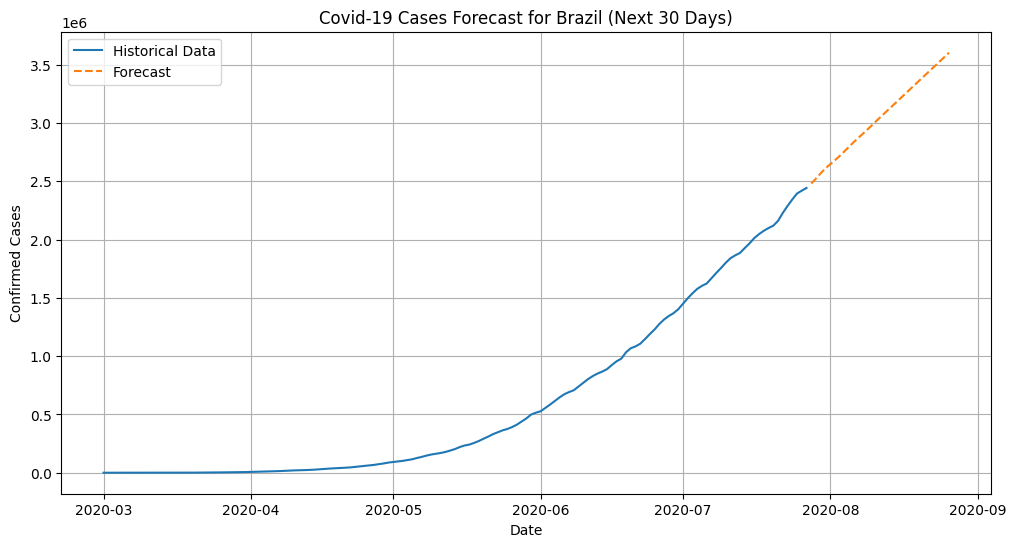

In [44]:
from statsmodels.tsa.arima.model import ARIMA


# Filter data for Brazil
brazil_data = covid_data[covid_data['Country/Region'] == 'Brazil']

# Aggregate and preprocess data
brazil_data['Date'] = pd.to_datetime(brazil_data['Date'])
brazil_data = brazil_data.groupby('Date')['Confirmed'].sum().reset_index()

# Train an ARIMA model
model = ARIMA(brazil_data['Confirmed'], order=(5, 1, 0))  # Adjust order as needed
model_fit = model.fit()

# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)
forecast_dates = [brazil_data['Date'].max() + pd.Timedelta(days=i) for i in range(1, 31)]

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(brazil_data['Date'], brazil_data['Confirmed'], label='Historical Data')
plt.plot(forecast_dates, forecast, label='Forecast', linestyle='--')
plt.title('Covid-19 Cases Forecast for Brazil (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid()
plt.show()


# 3. Visualization: Heatmap of Spread by Country

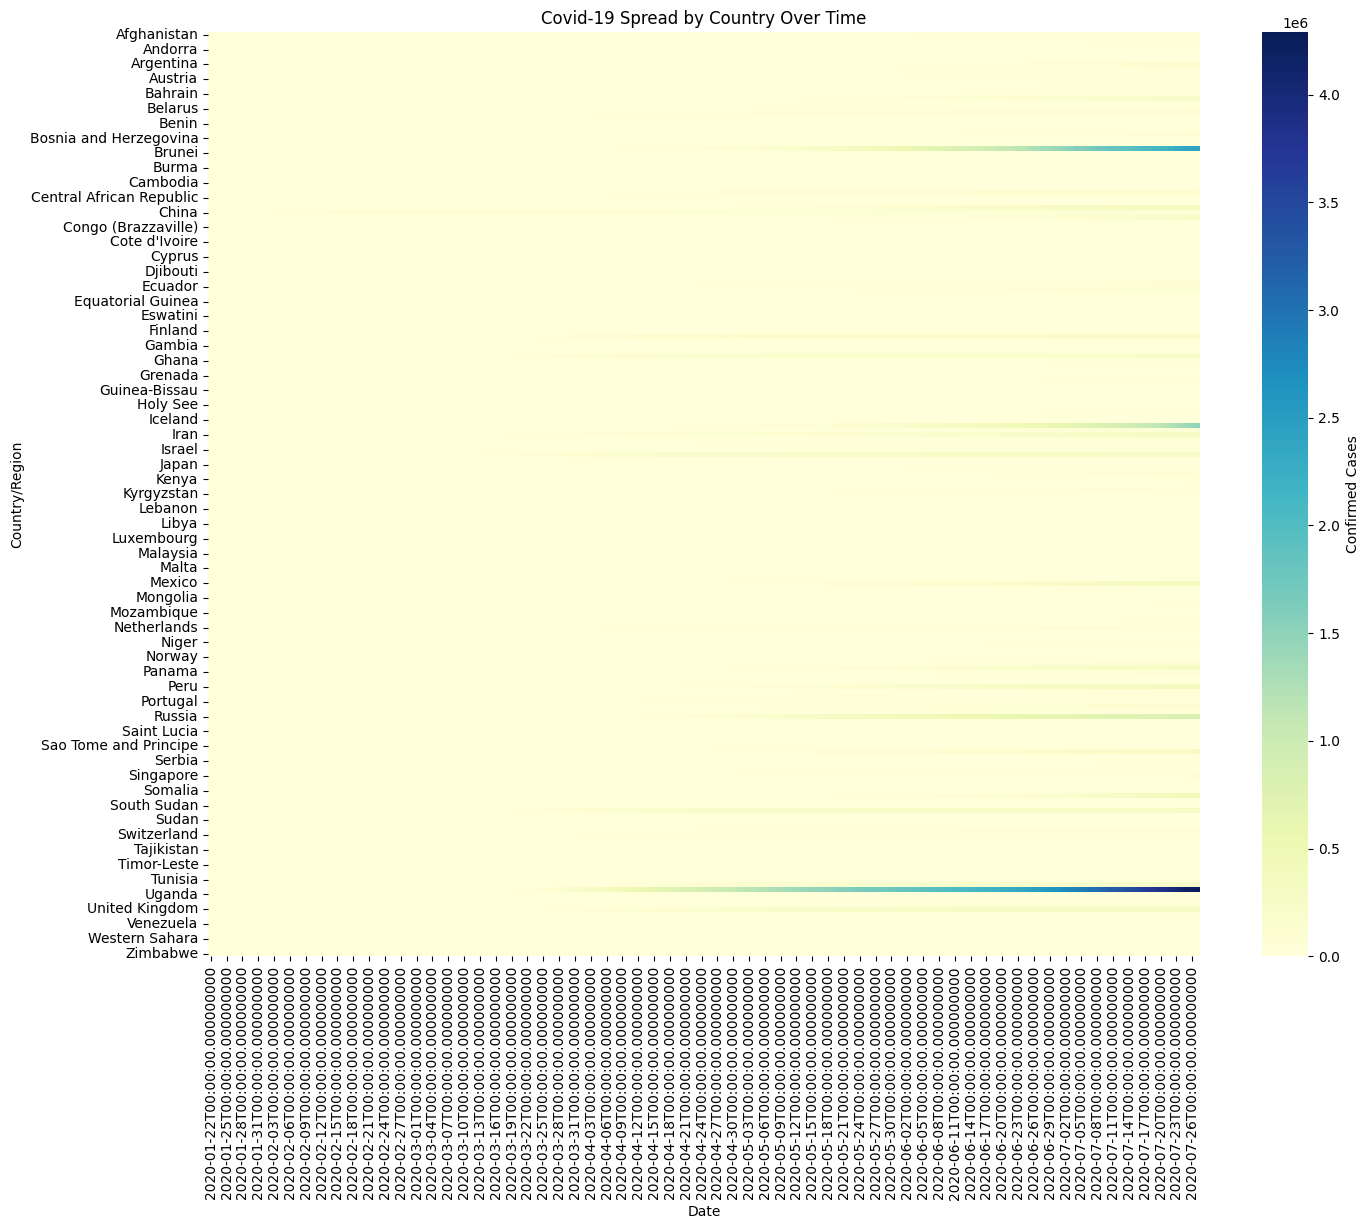

In [45]:
# Aggregate data by Country and Date
heatmap_data = covid_data.groupby(['Country/Region', 'Date'])['Confirmed'].sum().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Confirmed Cases'})
plt.title('Covid-19 Spread by Country Over Time')
plt.xlabel('Date')
plt.ylabel('Country/Region')
plt.show()


# 4. Correlation Analysis: Cases vs. Tests in USA

In [46]:
# Check if the 'Tests' column exists
if 'Tests' in covid_data.columns:
    # Filter data for USA
    usa_data = covid_data[covid_data['Country/Region'] == 'USA']

    # Compute correlation
    correlation = usa_data[['Confirmed', 'Tests']].corr().iloc[0, 1]
    print(f"Correlation between Confirmed Cases and Tests in USA: {correlation:.2f}")
else:
    print("The 'Tests' column is missing in the dataset. Please provide data with the number of tests conducted.")


The 'Tests' column is missing in the dataset. Please provide data with the number of tests conducted.
